In [1]:
# libraries
%matplotlib inline
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Task 2.

### (A)

We have the following system: $$x''+\mu x' + kx=u$$

Let's rewrite it in SS form:

$$\begin{bmatrix} x' \\ x'' \end{bmatrix} = 
\begin{bmatrix} 
0 & 1 \\
-k & - \mu 
\end{bmatrix} 
\begin{bmatrix}x \\ x' \end{bmatrix} + 
\begin{bmatrix}0 \\ 1 \end{bmatrix} u$$


For now let's set $k_p = 23 \ and \ k_d = 6$



In [2]:
# defining the system
mu = 14
k = 85
A = np.array([[0 , 1], [-k, -mu]])
B = np.array([[0], [1]])
time = np.linspace(0, 10, 1000)
x0 = np.random.randn(2)

In [3]:
def system(x, t, kp, kd, des_func, des_dot_func):
    cur_x = np.array([[x[0]], [x[1]]]) # turning flat x into a vector
    x_desired = des_func(t)
    e = x_desired - x[0]
    e_dot = des_dot_func(t) - x[1]
    u = kp * e + kd * e_dot
    return (A.dot(cur_x) + B.dot(u)).flatten()

In [4]:
kp = 23
kd = 6

# step function
step_func = lambda t: 0 if t < 5 else 1
step_func_dot = lambda t: 0

# sin function
sin_func = lambda t: np.sin(t)
sin_func_dot = lambda t: np.cos(t)

# quadratic function
quadratic_func = lambda t: t**2
quadratic_func_dot = lambda t: 2*t

# step input
solution_step = odeint(
    system, x0, time,
    (
        kp, kd,
        step_func,
        step_func_dot 
    )
)

# sin input
solution_sin = odeint(
    system, x0, time,
    (
        kp, kd,
        sin_func,
        sin_func_dot
    )
)

    pid_system, x0, time,
# quadratic input
solution_qudtratic = odeint(
    system, x0, time,
    (
        kp, kd,
        quadratic_func,
        quadratic_func_dot
    )
)

Initial State:  [0.24292001 0.4988888 ]


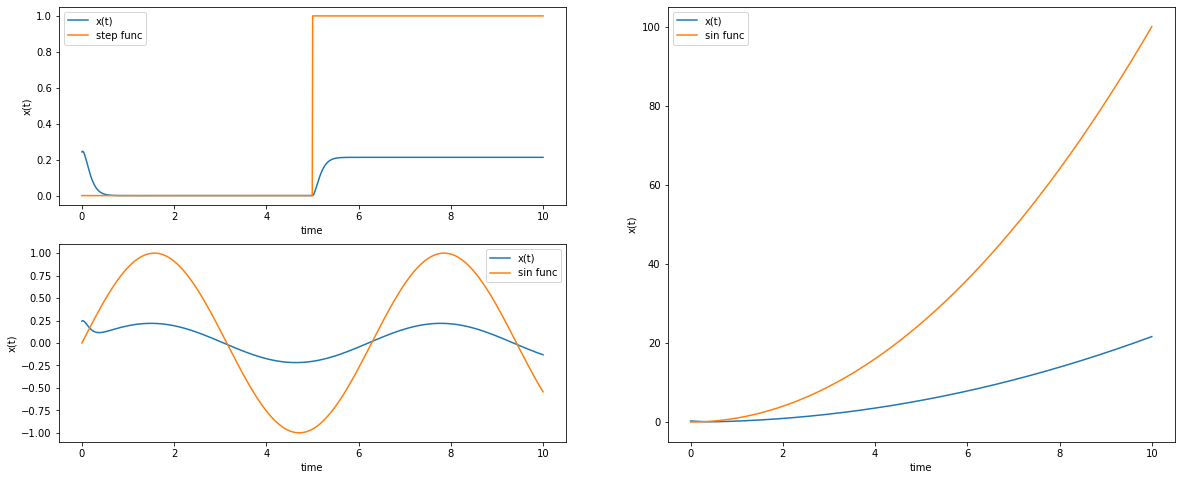

In [5]:
print('Initial State: ', x0)

plt.figure(figsize=(20,8))
ax = plt.subplot(221)
plt.plot(time, solution_step[:, 0], label = 'x(t)' )
plt.plot(time, [step_func(t) for t in time], label = 'step func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')

ax = plt.subplot(223)
plt.plot(time, solution_sin[:, 0], label = 'x(t)' )
plt.plot(time, [sin_func(t) for t in time], label = 'sin func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')

ax = plt.subplot(122)
plt.plot(time, solution_qudtratic[:, 0], label = 'x(t)' )
plt.plot(time, [quadratic_func(t) for t in time], label = 'sin func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')


plt.show()

### (B)

The Coefficients were found by applying "trial and error" method a lot.

First, I set $k_d$ to 0 and adjusted $k_p$.

After that I tuned $k_d$ and obtained $k_p = 2323 \ and \ kd = 123$

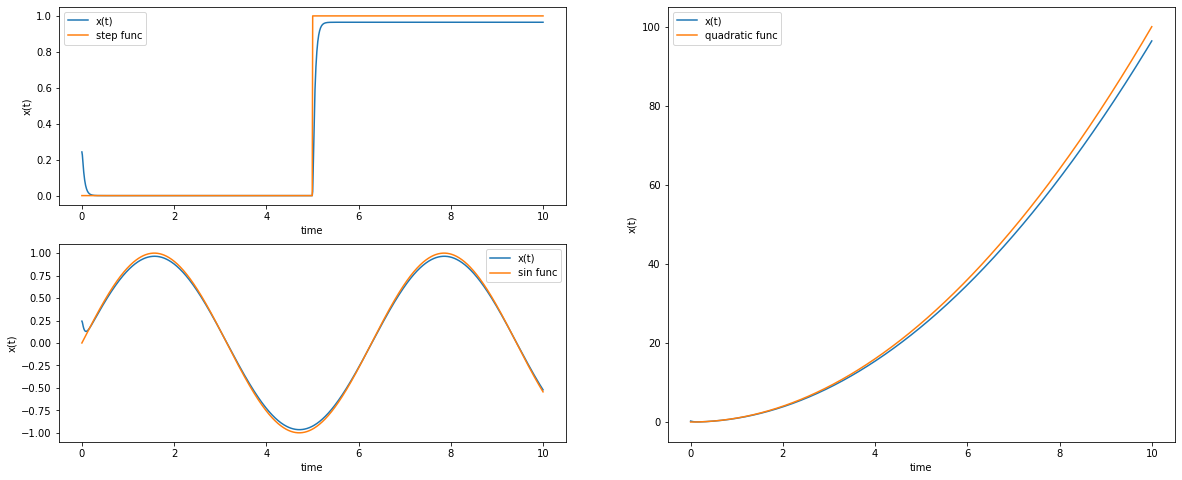

In [6]:
kp = 2323
kd = 123

# step input
solution_step = odeint(
    system, x0, time,
    (
        kp, kd,
        step_func,
        step_func_dot 
    )
)

# sin input
solution_sin = odeint(
    system, x0, time,
    (
        kp, kd,
        sin_func,
        sin_func_dot
    )
)

# quadratic input
solution_qudtratic = odeint(
    system, x0, time,
    (
        kp, kd,
        quadratic_func,
        quadratic_func_dot
    )
)

plt.figure(figsize=(20,8))
ax = plt.subplot(221)
plt.plot(time, solution_step[:, 0], label = 'x(t)' )
plt.plot(time, [step_func(t) for t in time], label = 'step func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')

ax = plt.subplot(223)
plt.plot(time, solution_sin[:, 0], label = 'x(t)' )
plt.plot(time, [sin_func(t) for t in time], label = 'sin func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')

ax = plt.subplot(122)
plt.plot(time, solution_qudtratic[:, 0], label = 'x(t)' )
plt.plot(time, [quadratic_func(t) for t in time], label = 'quadratic func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')


plt.show()

### (C)

If the error is stable then the systems itself is stable, so: 

$$ \begin{cases} x''+\mu x' + k x = u \\ (x^*)''+ \mu (x^*)' + k x^* = 0 \\ e = x^* - x \\ u = k_de' + k_pe\end{cases} $$

We can rewrite this system as follows:
$$ e''+\mu e'+k e=-k_p e - k_d e'$$

And transform it to SS form:


$$\begin{bmatrix} e' \\ e'' \end{bmatrix} = 
\begin{bmatrix} 
0 & 1 \\
-k_p-k & -k_d-\mu
\end{bmatrix} 
\begin{bmatrix}e \\ e' \end{bmatrix} + 
\begin{bmatrix}0 \\ 0 \end{bmatrix} u$$
$$y = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} e \\ e' \end{bmatrix} + \begin{bmatrix}  0 \end{bmatrix}u$$

Now, we may use the Matlab's `isstable` method:

```
k = 85;
mu = 14;
kd = 123;
kp = 2323;
A = [0 1; -kp-k -kd-mu];
B = [0; 0];
C = [1 0];
D = 0;
sys = ss(A,B,C,D);

Stable = isstable(sys);
Stable
```

which outputs

```

Stable =

  logical

   1
```

meaning that the system is stable

### (D)

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
10 & 3 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

In order to be able to control the system, we need to add input:
$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
10 & 3 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix}1 \\ 1 \end{bmatrix}u$$

Now we have a system with multiple states. Hence, now our error is a vector:

 $$e = \begin{bmatrix}x^*_1 \\ x^*_2 \end{bmatrix} - \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

Our input is:
$$u=k_d e' + k_p e$$ 

As we have several states which may depend on each other, $k_p$ and $k_d$ are both `2 × 2` matrices. 
Consequently, now we need to tune matrices instead of just numbers. 

If states turn out to be independent from each other, matrices become diagonal and we have to tune only 2 numbers for each gain.

### (E)

$$x''+\mu x' + kx + 9.8=u$$

Let's rewrite it in SS form:
$$\begin{bmatrix} x' \\ x'' \end{bmatrix} = 
\begin{bmatrix} 
0 & 1 \\
-k & - \mu 
\end{bmatrix} 
\begin{bmatrix}x \\ x' \end{bmatrix} + 
\begin{bmatrix}0 \\ 1 \end{bmatrix} u + \begin{bmatrix}0 \\ -9.8 \end{bmatrix}$$

Control: $u = k_p e + k_d e' + k_i \int e dt$.

Gains: $k_p=2323,\ k_d=123,\ k_i = 0.000001$

Integral is now discrete and computed as sum of errors multiplied by dt.
It also has a limit that it cannot exceed (`integ_limit`). This done to avoid large integral which leads to overshoots.

In [7]:
# setting up the time
start_time = 0
end_time = 10
time_intervals = 1000
time = np.linspace(start_time, end_time, time_intervals)
dt = float(end_time - start_time) / time_intervals

# limit so we won't have too large integral
# as it will lead to overshoots
integ_limit = 10
integ = 0

mu = 14
k = 85
A = np.array([[0 , 1], [-k, -mu]])
B = np.array([[0], [1]])
C = np.array([[0], [-9.8]])

def pid_system(x, t, kp, kd, ki, des_func, des_dot_func):
    global integ
    global dt
    cur_x = np.array([[x[0]], [x[1]]]) # turning flat x into a vector
    x_desired = des_func(t)
    
    # error
    e = x_desired - x[0]
    e_dot = des_dot_func(t) - x[1]
    
    #integral terms
    integ += e * dt
    integ = min(integ, integ_limit)
    integ = max(integ, -integ_limit)

    u = kp * e + kd * e_dot + ki * integ
    
    return (A.dot(cur_x) + B.dot(u) + C).flatten()

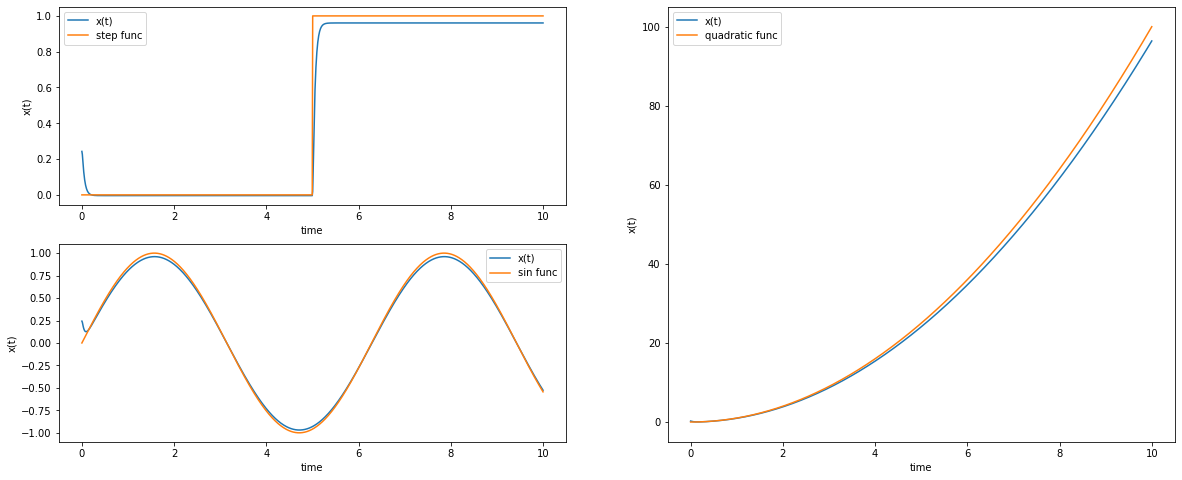

In [8]:
# gains
kp = 2323
kd = 123
ki = 0.000001

# step input
solution_step = odeint(
    pid_system, x0, time,
    (
        kp, kd, ki,
        step_func,
        step_func_dot 
    )
)

# sin input
solution_sin = odeint(
    pid_system, x0, time,
    (
        kp, kd, ki,
        sin_func,
        sin_func_dot 
    )
)

# quadratic input
solution_quadratic = odeint(
    pid_system, x0, time,
    (
        kp, kd, ki,
        quadratic_func,
        quadratic_func_dot 
    )
)

plt.figure(figsize=(20,8))
ax = plt.subplot(221)
plt.plot(time, solution_step[:, 0], label = 'x(t)' )
plt.plot(time, [step_func(t) for t in time], label = 'step func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')

ax = plt.subplot(223)
plt.plot(time, solution_sin[:, 0], label = 'x(t)' )
plt.plot(time, [sin_func(t) for t in time], label = 'sin func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')

ax = plt.subplot(122)
plt.plot(time, solution_quadratic[:, 0], label = 'x(t)' )
plt.plot(time, [quadratic_func(t) for t in time], label = 'quadratic func')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x(t)')


plt.show()